# 5. Multiple Regression Analysis: OLS Asymptotics

## 5.1 Simulation Exercises

In [1]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats



def simulation_estimation(n = 100,
                          r = 10000,
                          beta0 = 1,
                          beta1 = 0.5,
                          x_sd = 1,
                          mean_x = 4,
                          u_sd = 1):



    b1 = np.empty(r)

    # draw a sample of x, fixed over replications:
    x = stats.norm.rvs(mean_x, x_sd, size = n)

    # repeat r times:
    for i in range(r):
        # draw a sample of u (standard normal)
        u = stats.norm.rvs(0, u_sd, size = n)
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({"y":y,
                          "x":x})
        X = df[["x"]]
        X["Intercept"] = 1
        y = df[["y"]]
        # estimate conditional OLS:
        reg = sm.OLS(y, X)
        results = reg.fit()
        b1[i] = results.params["x"]
    return b1


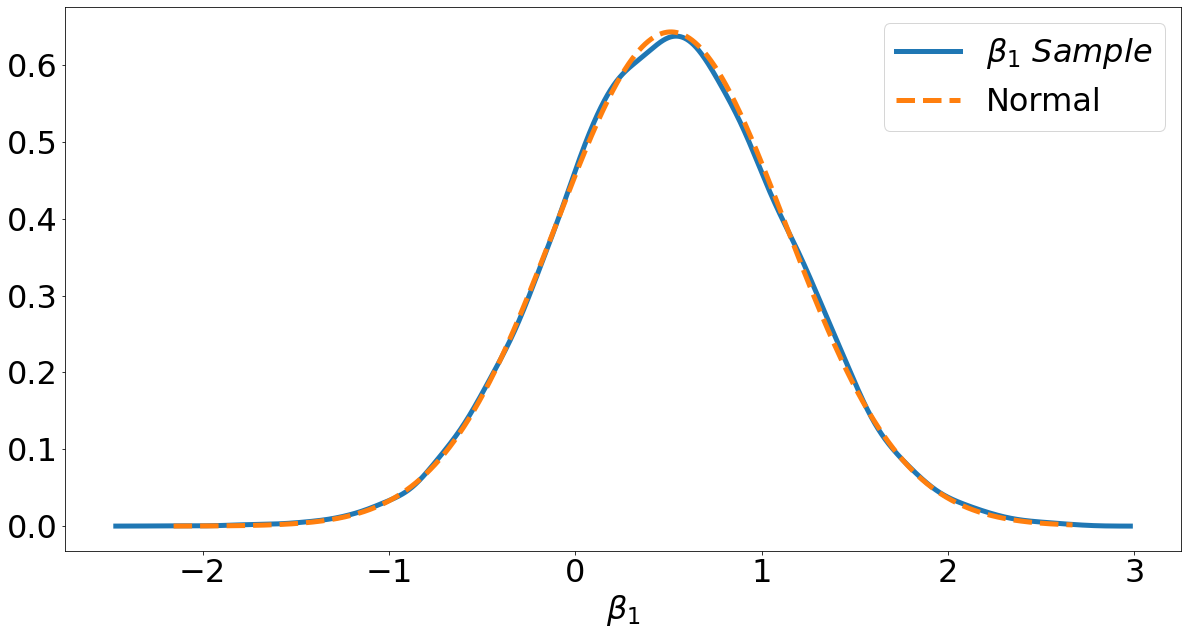

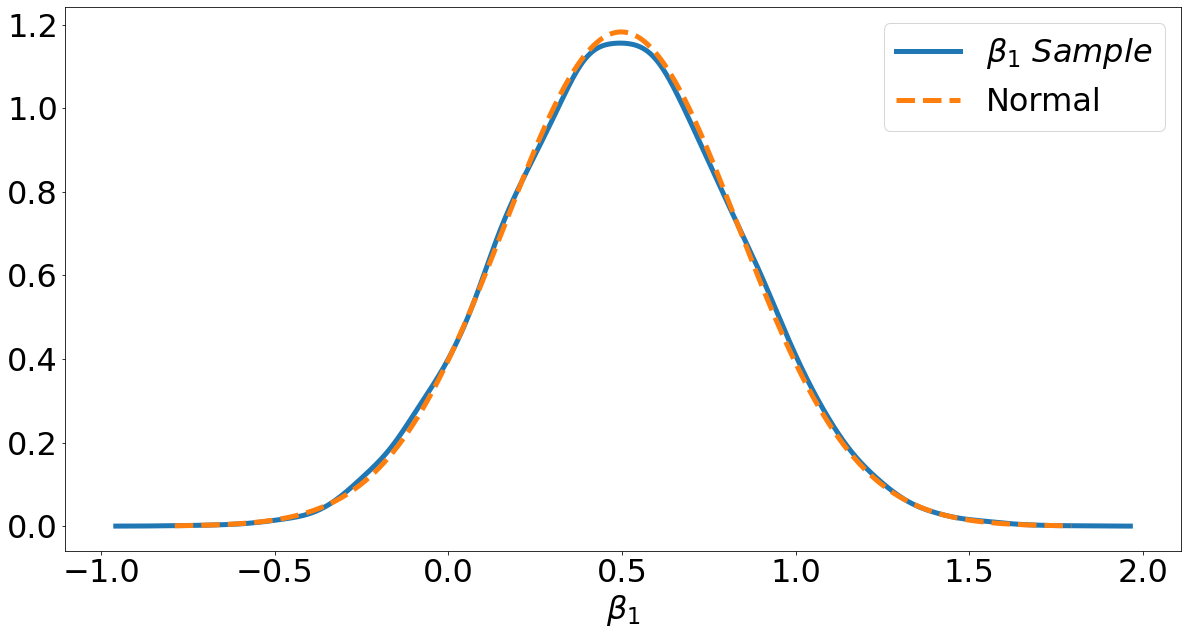

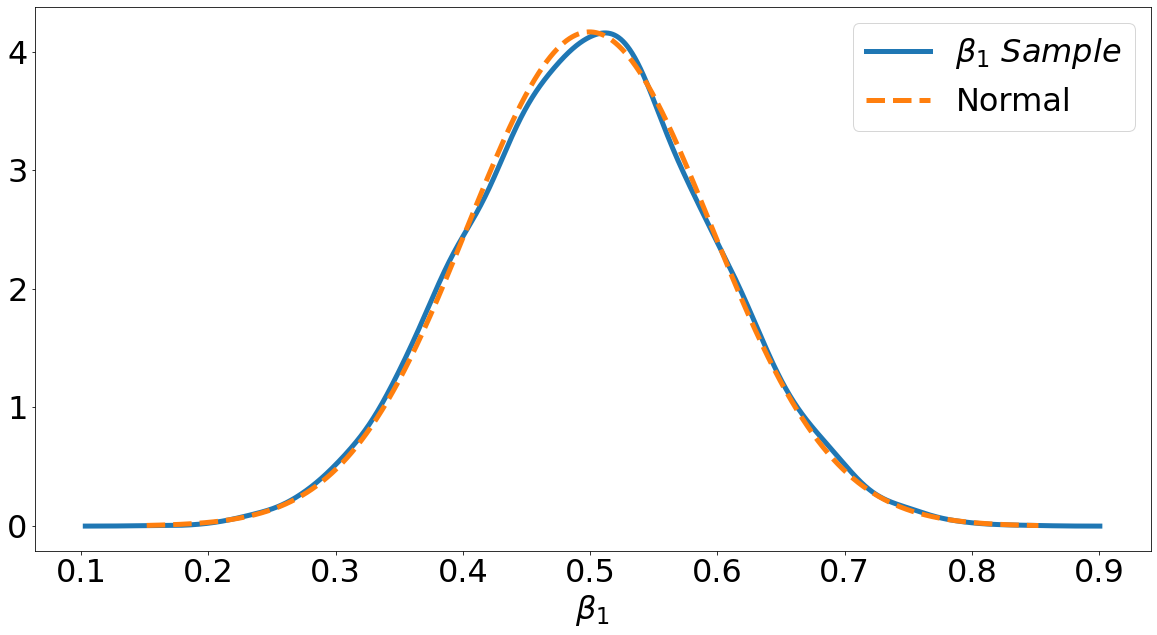

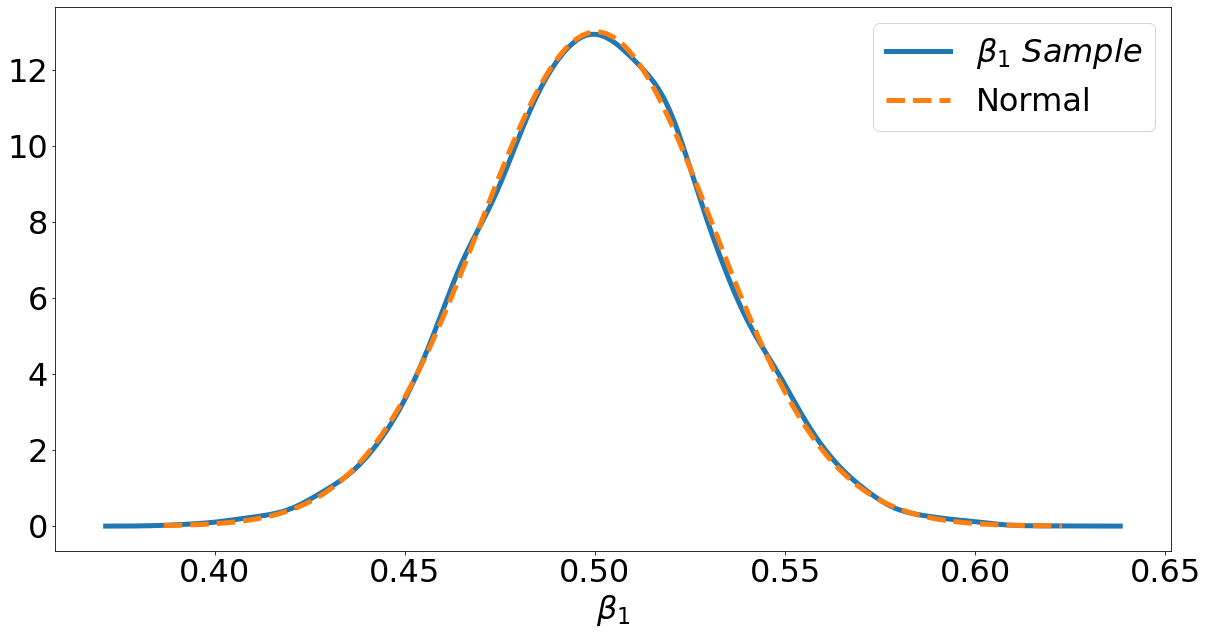

In [2]:
r = 10000
beta0 = 1
beta1 = 0.5
x_sd = 1
mean_x = 4
u_sd = 1
for n in [5, 10, 100, 1000]:
    b1 = simulation_estimation(n = n, r = r, beta0 = beta0, beta1 = beta1,
                              x_sd = x_sd, mean_x = mean_x, u_sd = u_sd)
    plt.rcParams.update({"font.size":32})
    fig, ax = plt.subplots(figsize = (20,10))
    sample_params = pd.DataFrame(b1, columns = ["Parameter"])
    kde = sm.nonparametric.KDEUnivariate(sample_params)
    kde.fit()
    ax.plot(kde.support, kde.density, linewidth = 5, label = "$\\beta_1$ $Sample$")
#     sample_params.plot.hist(bins = 10, ax = ax, density = True)
    SD = sample_params.std()
    x_range = np.linspace(min(b1),max(b1), num = r)
    pdf = stats.norm.pdf(x_range, np.mean(b1), SD)#  / n ** .5)
    pdf_df = pd.DataFrame([pdf, x_range]).T.set_index(1).rename(columns={0:"Normal"})
    # pdf_df
    pdf_df["Normal"].plot.line(ax = ax, linewidth = 5, linestyle = "--")
    ax.legend()
    ax.set_xlabel("$\\beta_1$")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats



def simulation_estimation(n = 100,
                          r = 10000,
                          beta0 = 1,
                          beta1 = 0.5,
                          x_sd = 1,
                          mean_x = 4,
                          u_sd = 1):



    b1 = np.empty(r)

    # draw a sample of x, fixed over replications:
    x = stats.norm.rvs(mean_x, x_sd, size = n)

    # repeat r times:
    for i in range(r):
        # draw a sample of u (standard normal)
        u = (stats.chi2.rvs(1, size = n) - 1) / np.sqrt(2)
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({"y":y,
                          "x":x})
        X = df[["x"]]
        X["Intercept"] = 1
        y = df[["y"]]
        # estimate conditional OLS:
        reg = sm.OLS(y, X)
        results = reg.fit()
        b1[i] = results.params["x"]
    return b1


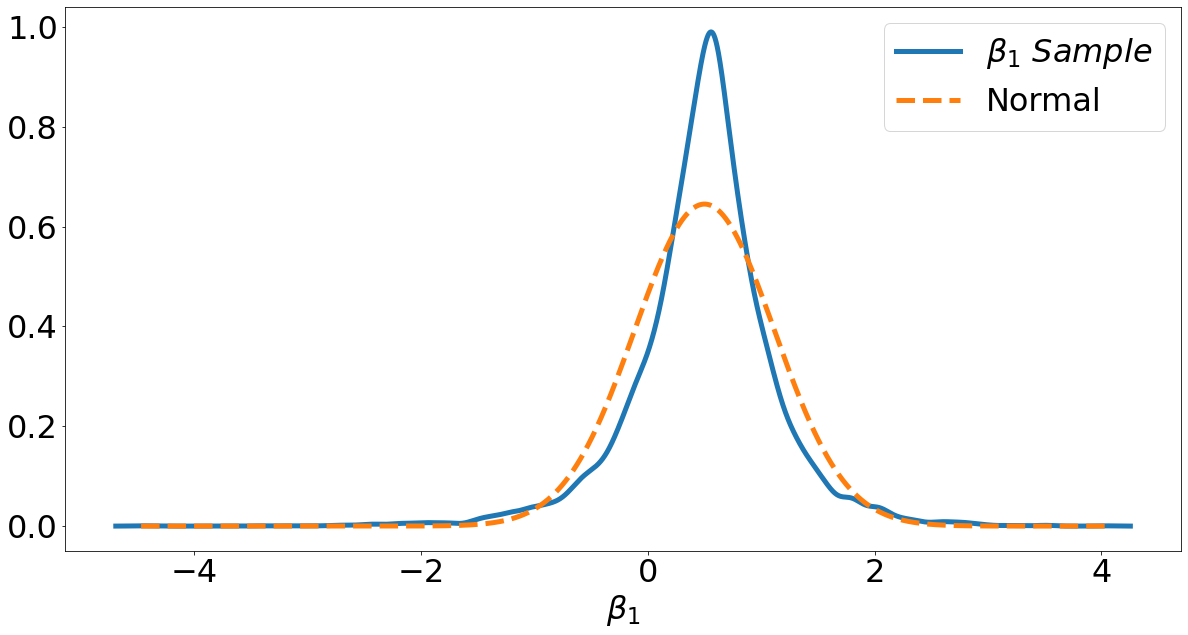

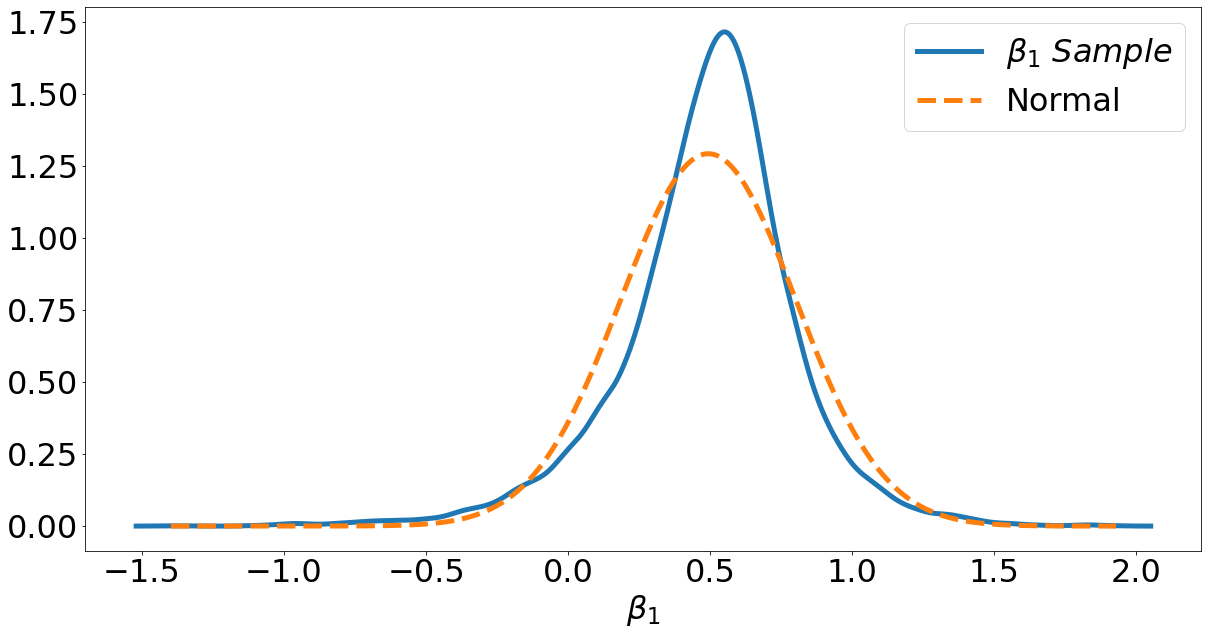

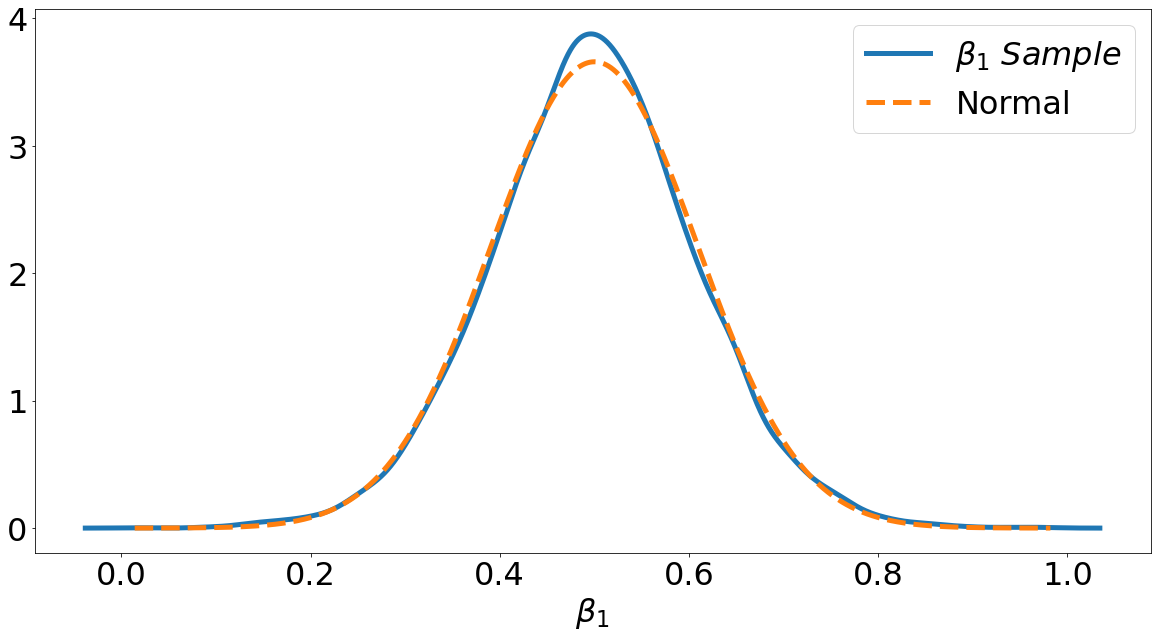

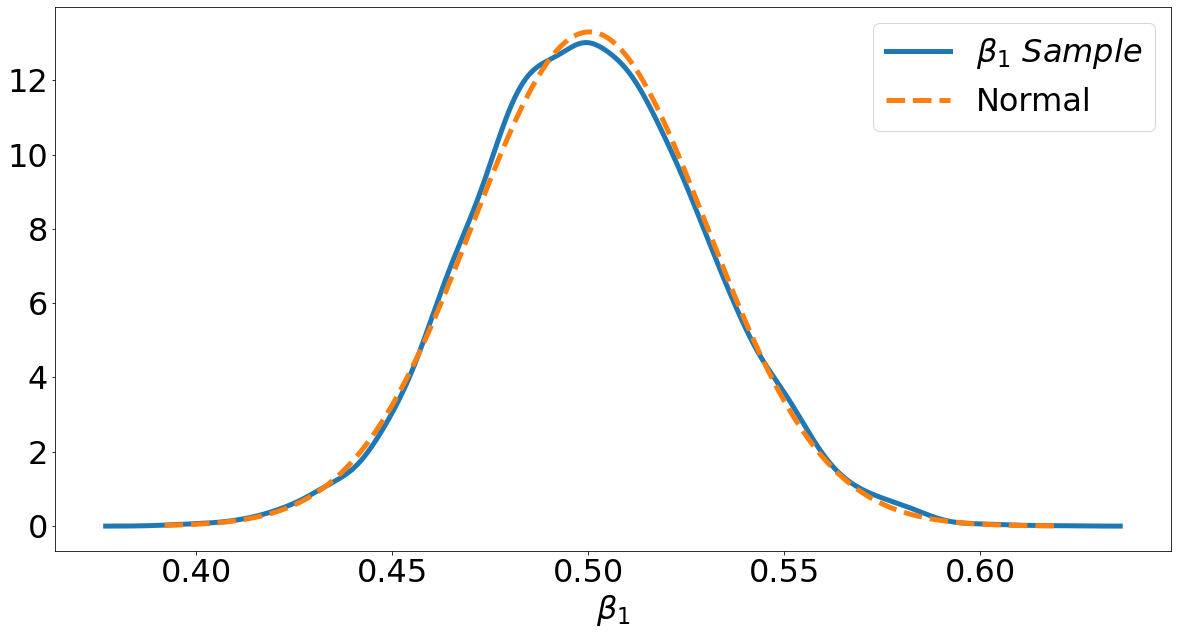

In [4]:
for n in [5, 10, 100, 1000]:
    b1 = simulation_estimation(n = n, r = r, beta0 = beta0, beta1 = beta1,
                              x_sd = x_sd, mean_x = mean_x, u_sd = u_sd)
    plt.rcParams.update({"font.size":32})
    fig, ax = plt.subplots(figsize = (20,10))
    sample_params = pd.DataFrame(b1, columns = ["Parameter"])
    kde = sm.nonparametric.KDEUnivariate(sample_params)
    kde.fit()
    ax.plot(kde.support, kde.density, linewidth = 5, label = "$\\beta_1$ $Sample$")
#     sample_params.plot.hist(bins = 10, ax = ax, density = True)
    SD = sample_params.std()
    x_range = np.linspace(min(b1),max(b1), num = r)
    pdf = stats.norm.pdf(x_range, np.mean(b1), SD)#  / n ** .5)
    pdf_df = pd.DataFrame([pdf, x_range]).T.set_index(1).rename(columns={0:"Normal"})
    # pdf_df
    pdf_df["Normal"].plot.line(ax = ax, linewidth = 5, linestyle = "--")
    ax.legend()
    ax.set_xlabel("$\\beta_1$")

### 5.1.3. (Not) Conditioning on the Regressor

If we draw a sample of individuals , both their dependnet and independent variables differ across samples. In these cases, the distribution "conditional on the sample values of the independent variables" can only serve as an approximation of the actual distribution with varying regressors. for large samples, this distinction is irrelevant and the asymptotic distribution is the same.

For small samples, kurtosis of distribution of sample means is different than the kurtosis of a normal distibution, which is 3.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats



def simulation_estimation(n = 100,
                          r = 10000,
                          beta0 = 1,
                          beta1 = 0.5,
                          x_sd = 1,
                          mean_x = 4,
                          u_sd = 1):



    b1 = np.empty(r)

    # draw a sample of x, fixed over replications:

    # repeat r times:
    for i in range(r):
        # new x-values are generated for every sample. So we
        # will have variation due to the error term and due to a modestly changing mean
        x = stats.norm.rvs(mean_x, x_sd, size = n)
        # draw a sample of u (standard normal)
        u = stats.norm.rvs(0, u_sd, size = n)
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({"y":y,
                          "x":x})
        X = df[["x"]]
        X["Intercept"] = 1
        y = df[["y"]]
        # estimate conditional OLS:
        reg = sm.OLS(y, X)
        results = reg.fit()
        b1[i] = results.params["x"]
    return b1


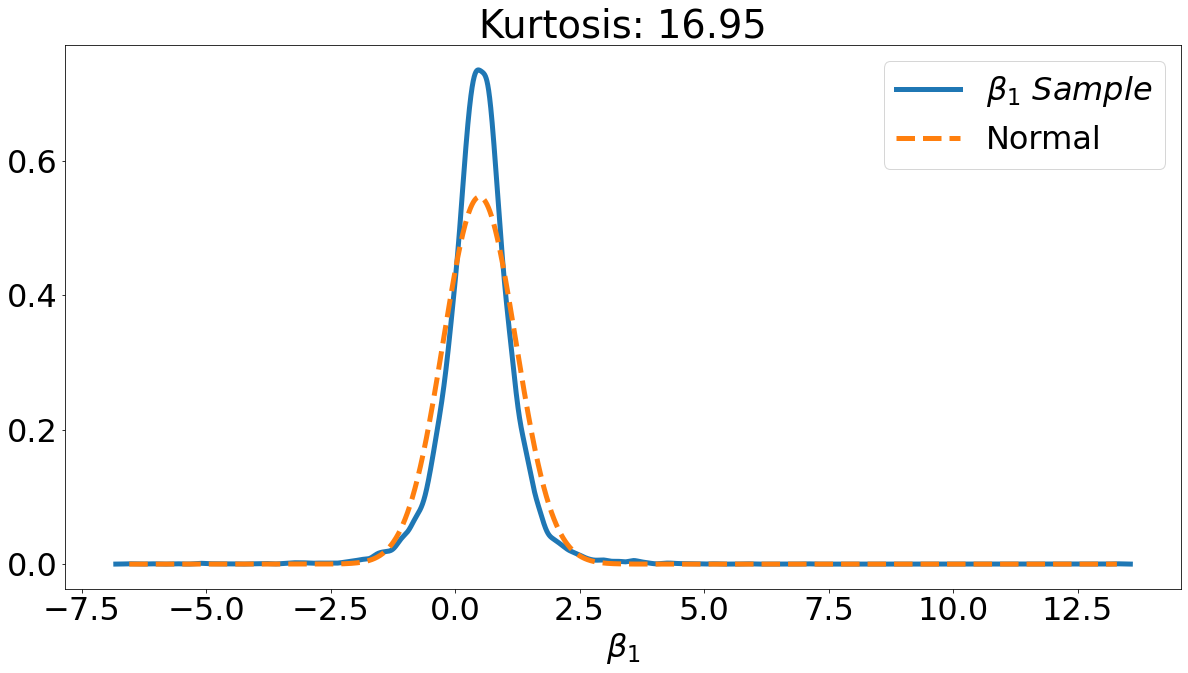

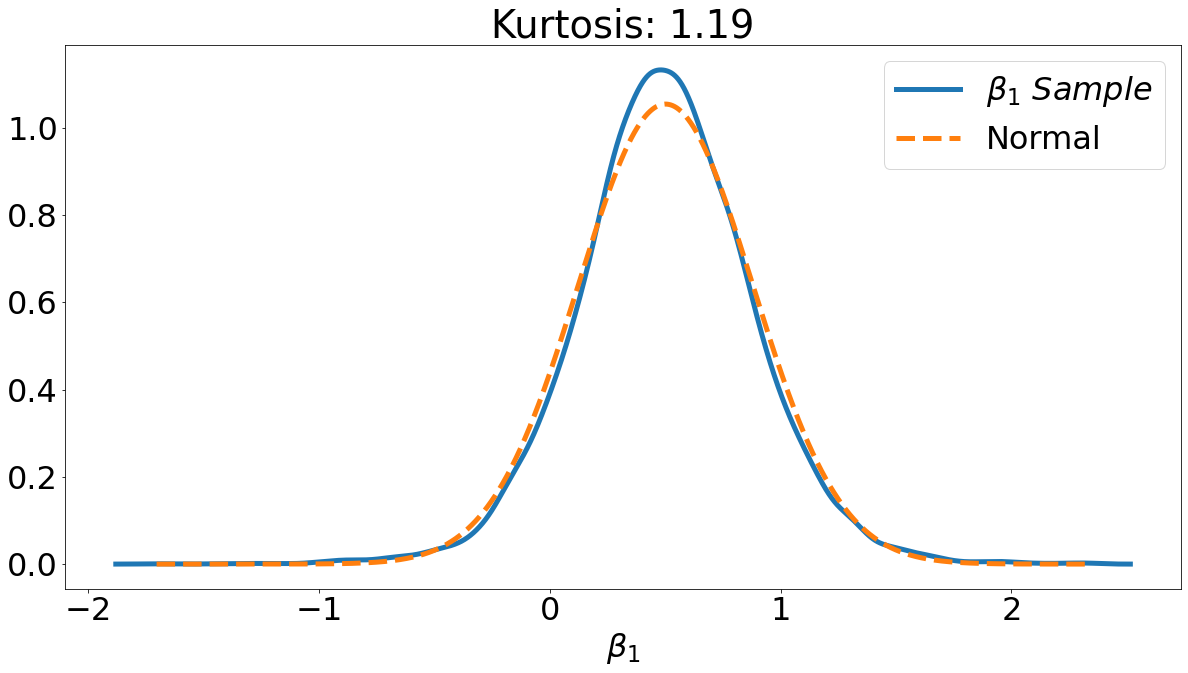

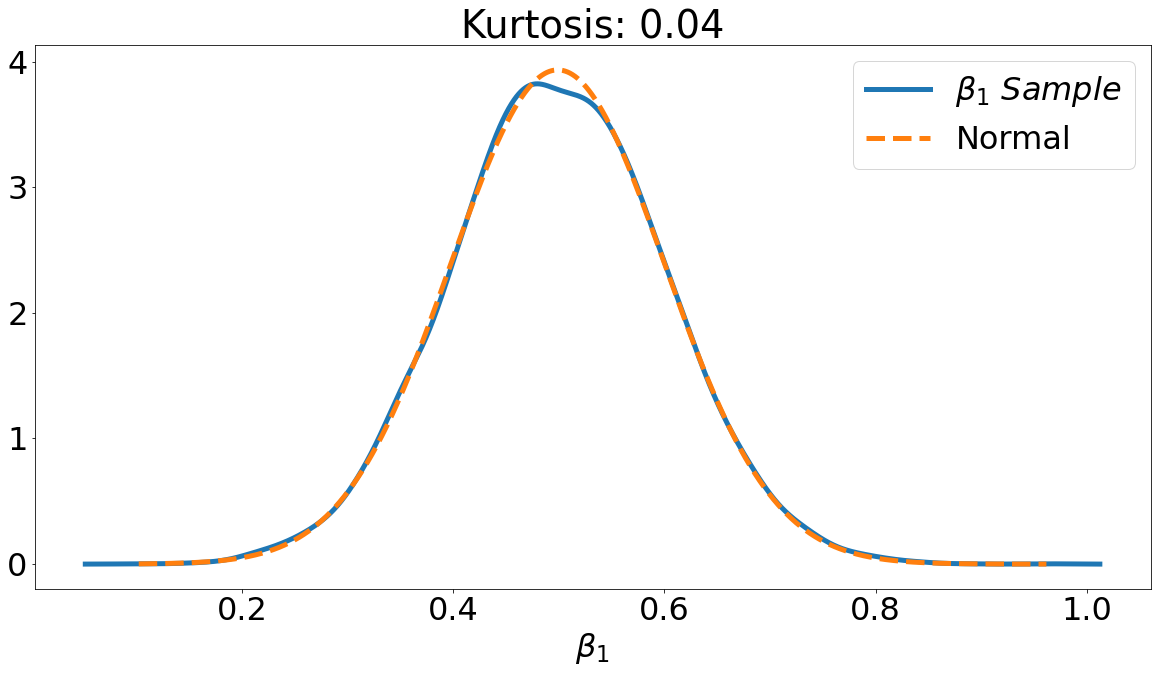

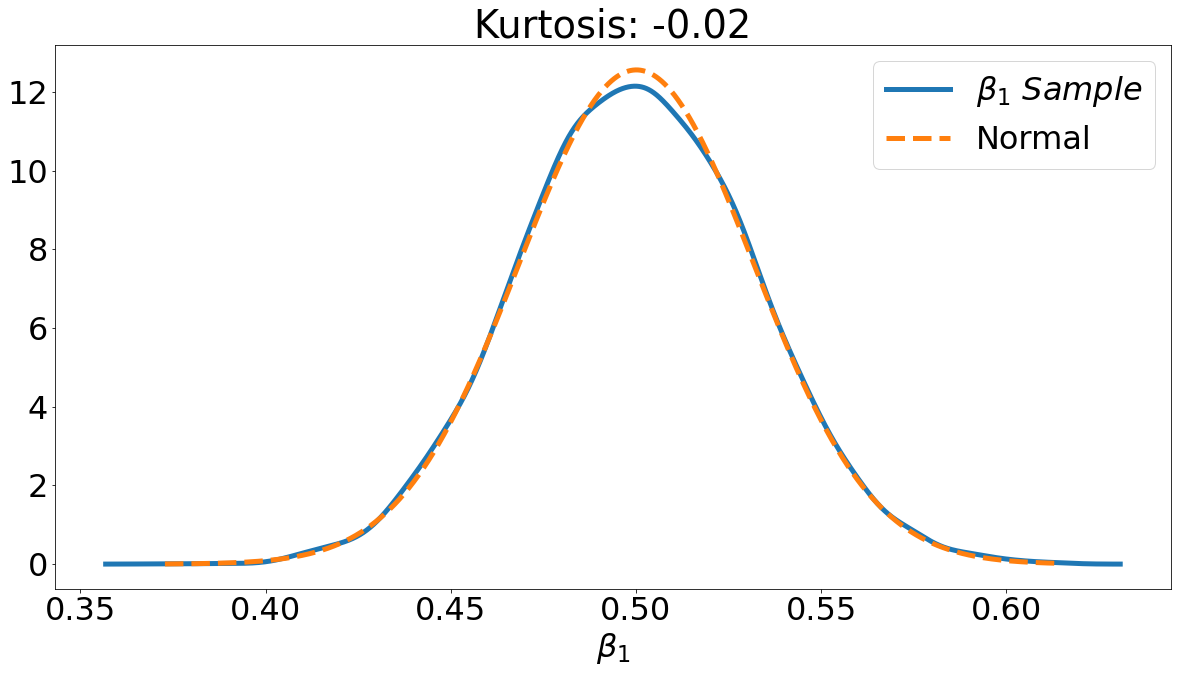

In [6]:
for n in [5, 10, 100, 1000]:
    b1 = simulation_estimation(n = n, r = r, beta0 = beta0, beta1 = beta1,
                              x_sd = x_sd, mean_x = mean_x, u_sd = u_sd)
    plt.rcParams.update({"font.size":32})
    fig, ax = plt.subplots(figsize = (20,10))
    sample_params = pd.DataFrame(b1, columns = ["Parameter"])
    kde = sm.nonparametric.KDEUnivariate(sample_params)
    kde.fit()
    ax.plot(kde.support, kde.density, linewidth = 5, label = "$\\beta_1$ $Sample$")
#     sample_params.plot.hist(bins = 10, ax = ax, density = True)
    SD = sample_params.std()
    x_range = np.linspace(min(b1),max(b1), num = r)
    pdf = stats.norm.pdf(x_range, np.mean(b1), SD)#  / n ** .5)
    pdf_df = pd.DataFrame([pdf, x_range]).T.set_index(1).rename(columns={0:"Normal"})
    # pdf_df
    pdf_df["Normal"].plot.line(ax = ax, linewidth = 5, linestyle = "--")
    ax.legend()
    ax.set_xlabel("$\\beta_1$")
    ax.set_title("Kurtosis: " + str(round(stats.kurtosis(b1),2)))

## 5.2. LM Test

$$LM = nR_{\tilde{u}}^2$$

Regress:

$$U_R = f(U_{UR})$$



In [7]:
crime1 = woo.dataWoo("crime1")

names = ["narr86", "pcnv", "ptime86", "qemp86", "avgsen", "tottime"]
data = crime1[names]

# 1. estimate restricted model:
# exclude the last two x-variables from 
#  the unrestricted regression
y_name, x_names = names[0], names[1:-2]
X = data[x_names]
X["Intercept"] = 1
y = data[[y_name]]
reg_r = sm.OLS(y, X)
results_r = reg_r.fit()
r2_r = results_r.rsquared
print("r2_r:", r2_r)

# estimate LM statistic by regressing u-tilde
#  on x variables from unrestricted regression
#  
y_name, x_names = "$\tilde{u}$", names[1:]
data[y_name] = results_r.resid
X = data[x_names]
X["Intercept"] = 1
y = data[[y_name]]
reg_LM = sm.OLS(y,X)
results_LM = reg_LM.fit()

r2_LM = results_LM.rsquared
LM = r2_LM * results_LM.nobs
p_LM = 1 - stats.chi2.cdf(LM, 2)
print("r2_LM:", r2_LM)
print("LM:", LM)
print("p_LM:", p_LM)
# cv = stats.chi2.ppf(1 - 0.1, 2)


# estimtate unrestricted model
y_name = names[0]
X = data[x_names]
X["Intercept"] = 1
y = data[[y_name]]
reg_ur = sm.OLS(y, X)
results_ur = reg_ur.fit()
results_ur.summary()


r2_r: 0.041323307701230605
r2_LM: 0.0014938456737877415
LM: 4.070729461071595
p_LM: 0.13063282803267184


C:\Users\JLCat\AppData\Local\Temp\ipykernel_15016\2034642322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15016\2034642322.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_name] = results_r.resid
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15016\2034642322.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 narr86   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     24.29
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           5.43e-24
Time:                        10:50:58   Log-Likelihood:                -3392.7
No. Observations:                2725   AIC:                             6797.
Df Residuals:                    2719   BIC:                             6833.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pcnv          -0.1512      0.041     -3.701      0.000      -0.231      -0.071
ptime86       -0.0393      0.009     -4.403      0.000      -0.057      -0.022
qemp86        -0.1031      0.010     -9.915      0.000      -0.123      -0.083
avgsen        -0.0070      0.012     -0.568      0.570      -0.031       0.017
tottime        0.0121      0.010      1.263      0.207      -0.007       0.031
Intercept      0.7061      0.033     21.297      0.000       0.641       0.771
==============================================================================
Omnibus:                     2395.326   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106869.684
Skew:                           4.001   Prob(JB):                         0.00
Kurtosis:                      32.618   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p value of LM is 0.131, meaning that we fail to reject the null. The addition of _avgsen_ and _tottime_ do not sufficiently reduce unexplained variance to merit inclusion. This result is at odds with the F-statistic.